In [31]:
import matplotlib.pyplot as plt
import numpy as np
import imageio


def plot_temperature(temperature):
    plt.imshow(temperature, cmap="hot", interpolation="nearest")
    plt.colorbar()
    plt.show()


def plot_grid(grid):
    plt.imshow(grid, cmap="tab20", interpolation="nearest")
    plt.colorbar()
    plt.show()


def plot_combined(temperature, grid, filename):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot temperature
    axs[0].imshow(temperature, cmap="hot", interpolation="nearest")
    axs[0].set_title("Temperature")
    fig.colorbar(axs[0].images[0], ax=axs[0])

    # Plot grid
    axs[1].imshow(grid, cmap="tab20", interpolation="nearest")
    axs[1].set_title("Grid")
    fig.colorbar(axs[1].images[0], ax=axs[1])

    # Save the combined plot as a PNG file
    plt.savefig(filename)
    plt.show()


def gen_gif(paths):
    images = []
    for path in paths:
        images.append(imageio.imread(path))
    imageio.mimsave("gif_path.gif", images, fps=2, format="GIF")

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random


def initialize_grid(size, num_grains):
    grid = np.zeros((size, size), dtype=int)
    for _ in range(num_grains):
        x, y = random.randint(1, size - 2), random.randint(1, size - 2)
        grid[x, y] = random.randint(0, 19)  # _ + 1  # Assign unique grain ID
    return grid


def get_neighbors(grid, x, y):
    neighbors = []
    size = len(grid)
    for ndx in [-1, 0, 1]:
        for ndy in [-1, 0, 1]:
            if ndx == 0 and ndy == 0:
                continue
            nx = x + ndx
            ny = y + ndy
            if nx < 0 or nx >= size or ny < 0 or ny >= size:
                continue
            neighbors.append(grid[nx, ny])
    return neighbors


def update_grid(grid, temperature, dt):
    new_grid = grid.copy()
    for x in range(1, grid.shape[0] - 1):
        for y in range(1, grid.shape[1] - 1):
            if temperature[x, y] > 0.80:
                new_grid[x, y] = 0
                continue
            if grid[x, y] == 0:  # If cell is empty
                # adjust to dt
                # if random.random() > (dt * 100):
                #     continue
                if random.random() < ((1 - temperature[x, y] / 0.8) / 500):
                    new_grid[x, y] = random.randint(0, 19)
                neighbors = get_neighbors(grid, x, y)
                non_zero_neighbors = [n for n in neighbors if n != 0]
                if non_zero_neighbors:
                    # Temperature influences the probability of grain growth
                    if random.random() > (temperature[x, y] / 0.8):
                        new_grid[x, y] = random.choice(non_zero_neighbors)
    return new_grid

Adjusted dt for stability. New value dt=0.0025
(152, 152)


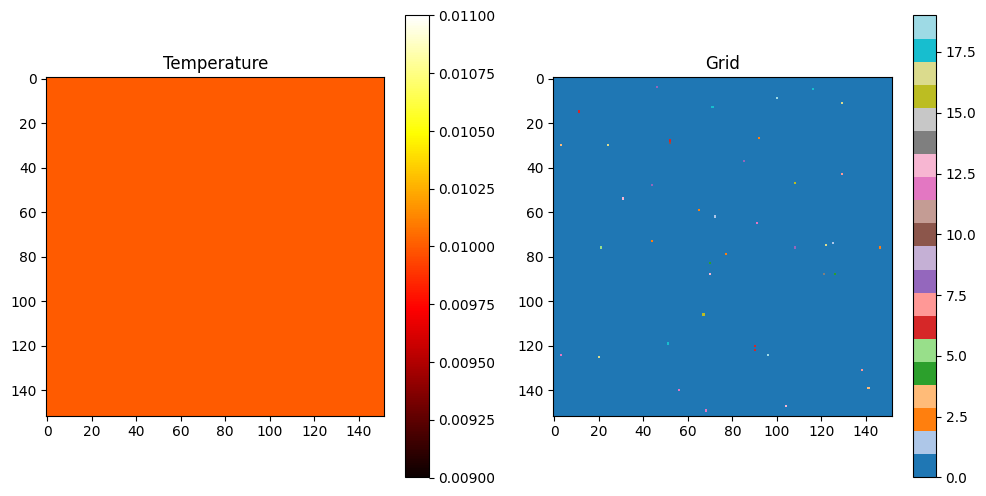

simulated for time 0


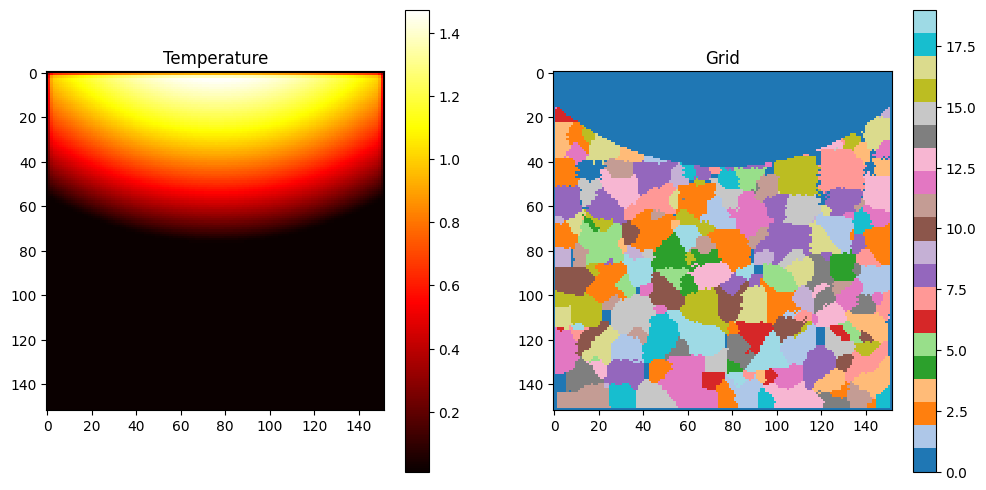

simulated for time 0.10250000000000005


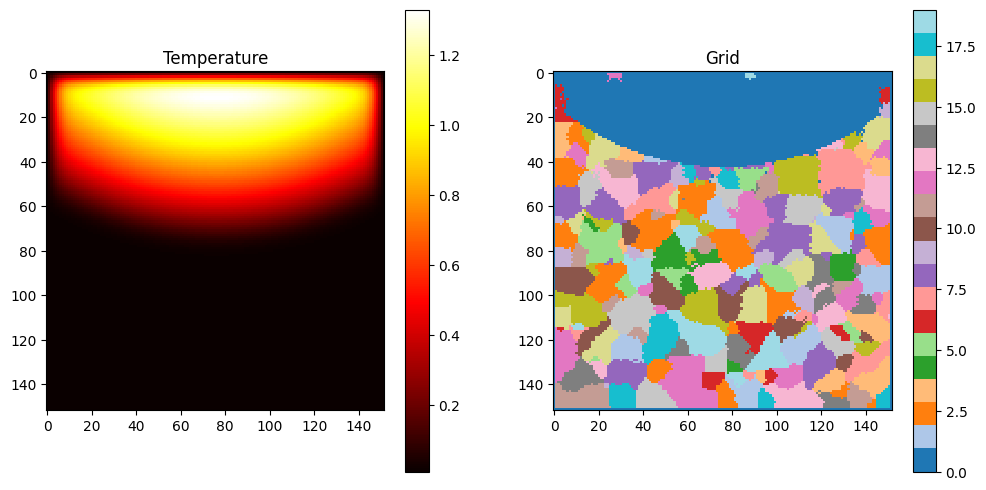

simulated for time 0.20500000000000013


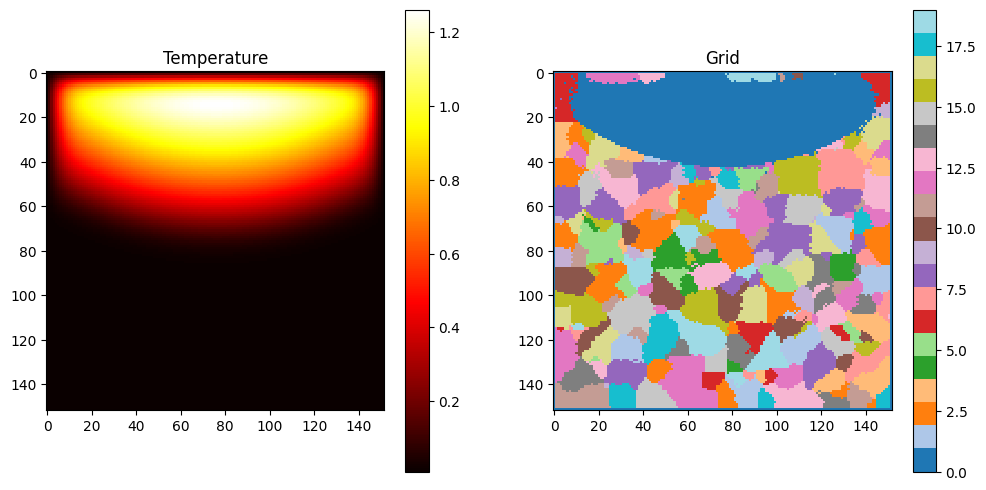

simulated for time 0.3075000000000002


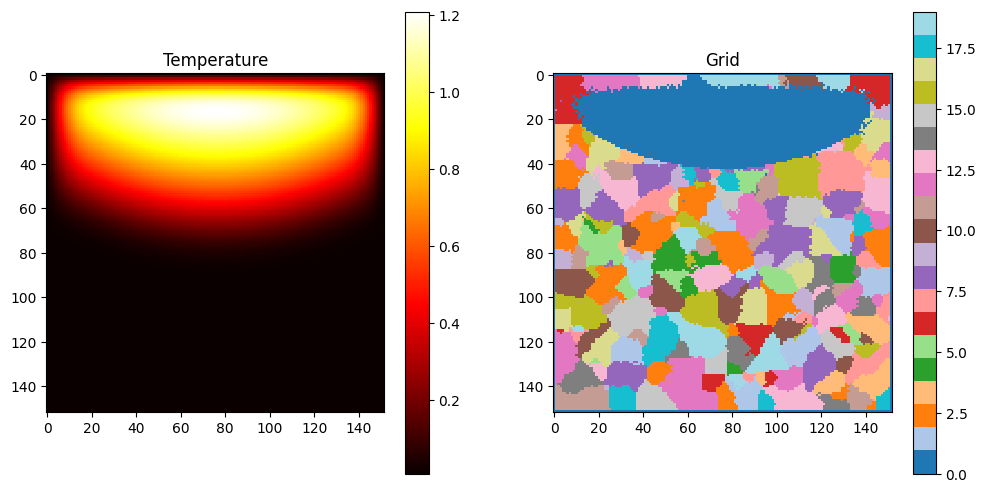

simulated for time 0.4100000000000003


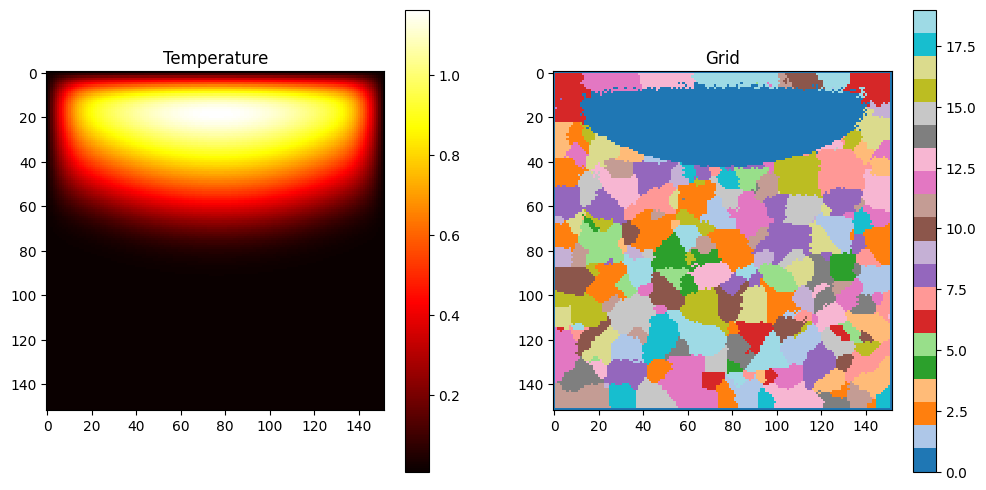

simulated for time 0.5125000000000001


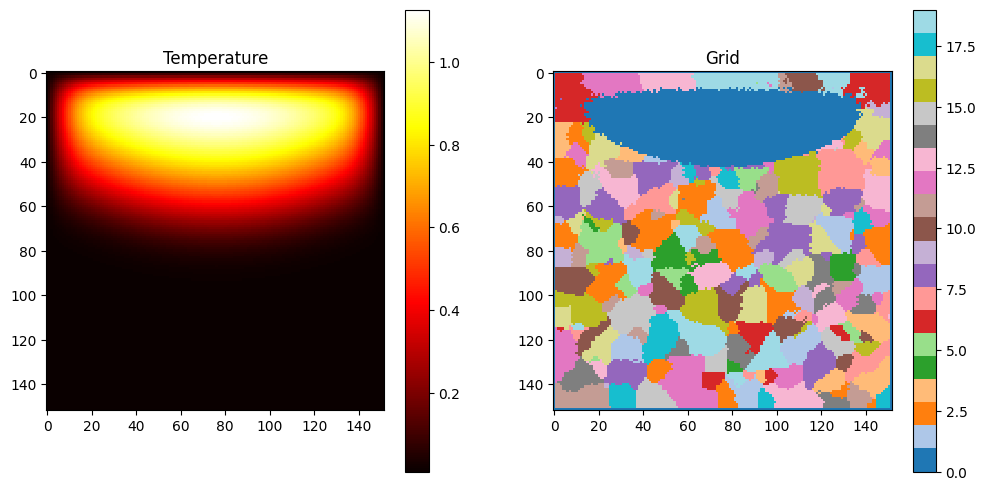

simulated for time 0.6149999999999979


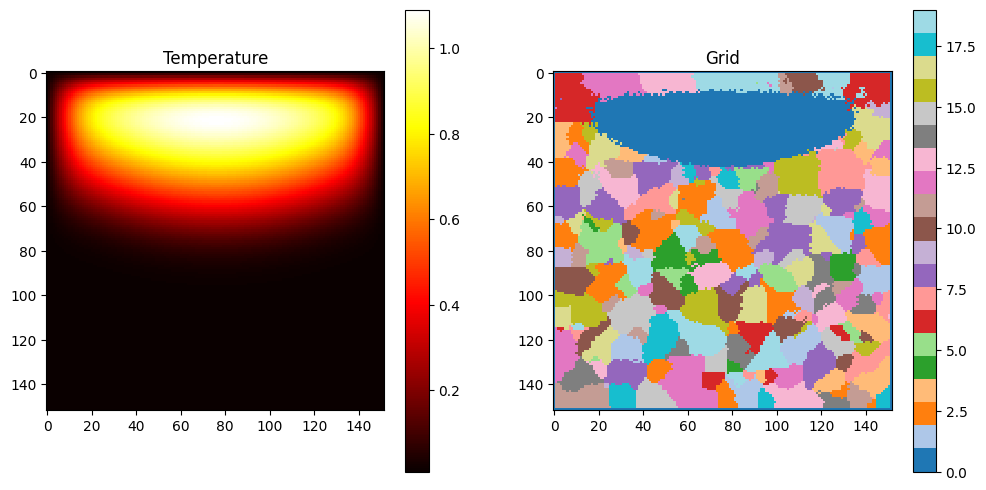

simulated for time 0.7174999999999957


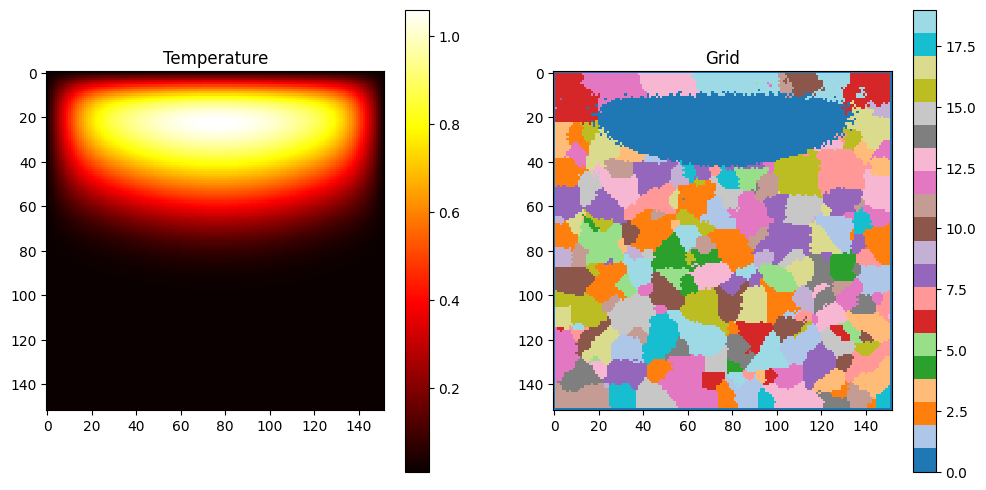

simulated for time 0.8199999999999935


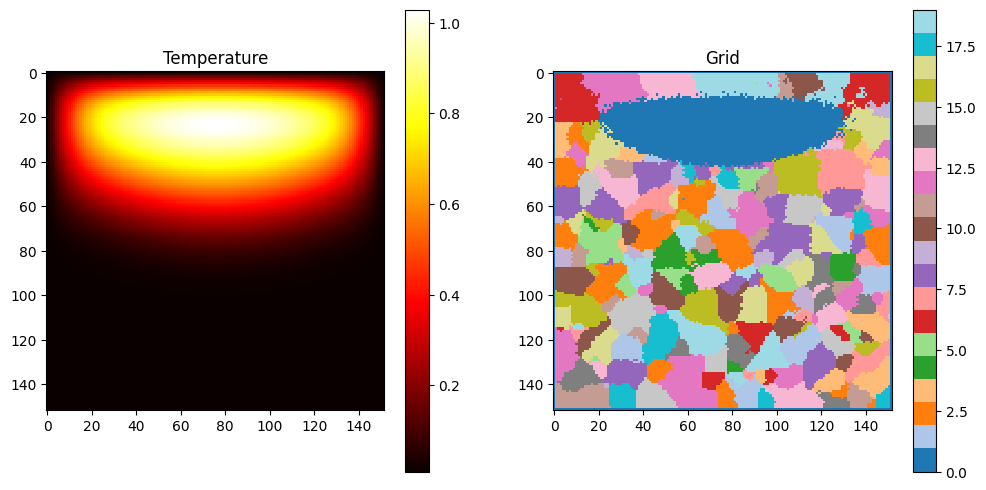

simulated for time 0.9224999999999913


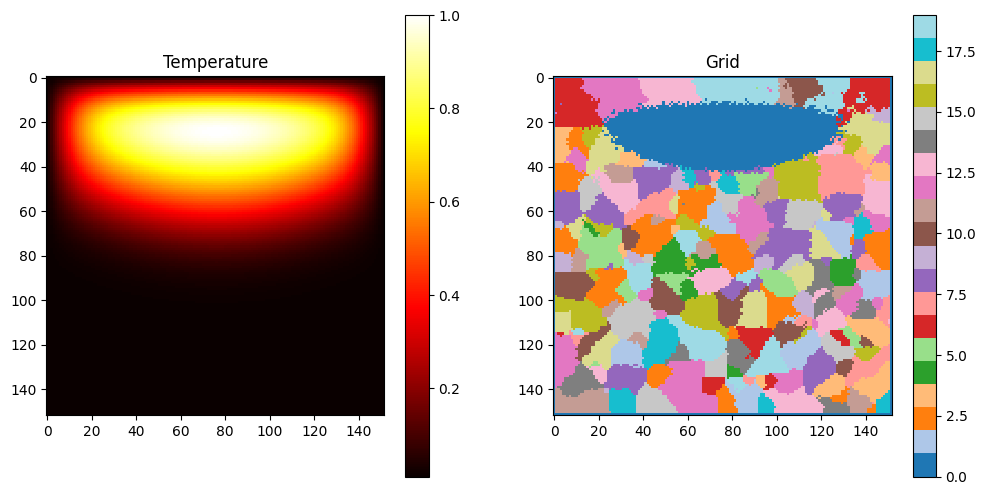

simulated for time 1.0249999999999893


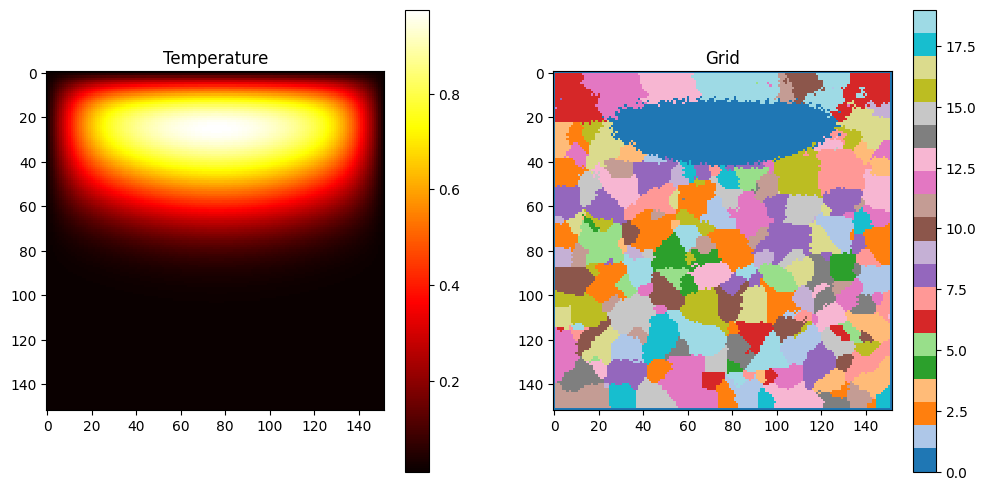

simulated for time 1.127499999999987


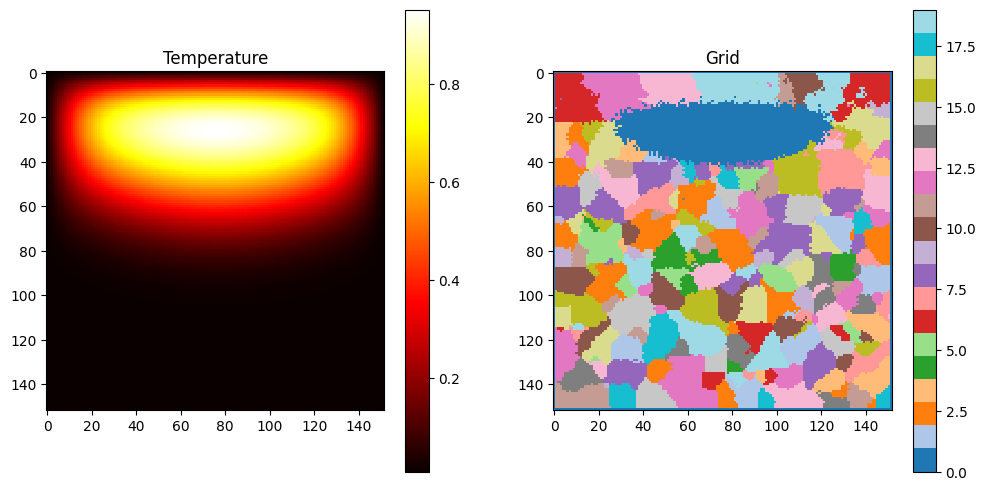

simulated for time 1.2299999999999849


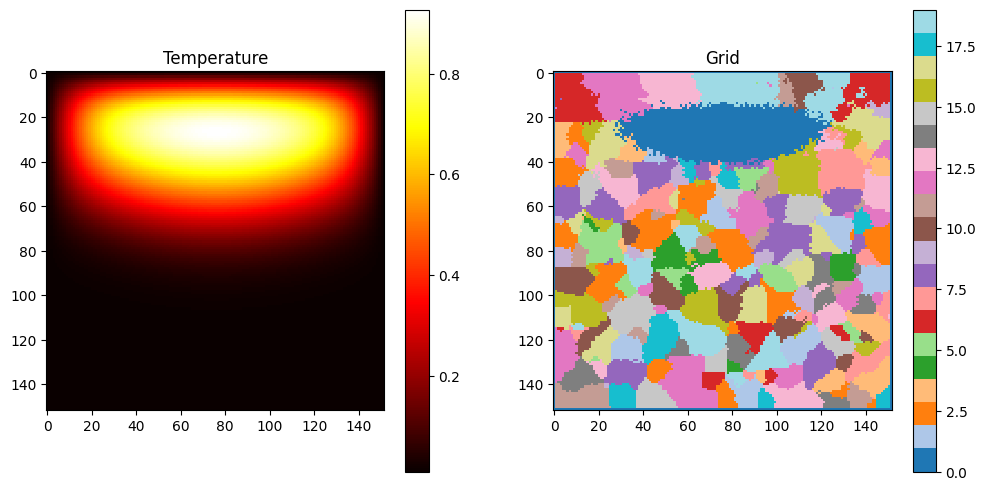

simulated for time 1.3324999999999827


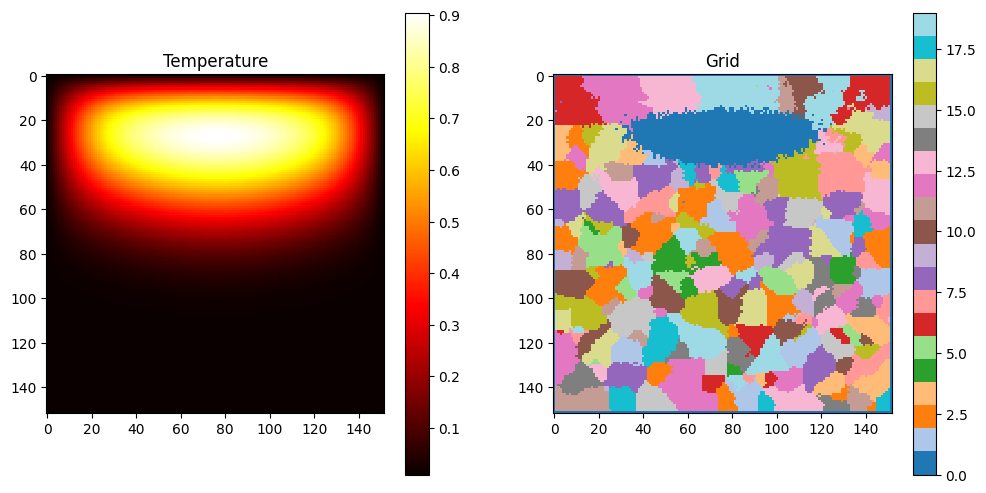

simulated for time 1.4349999999999805


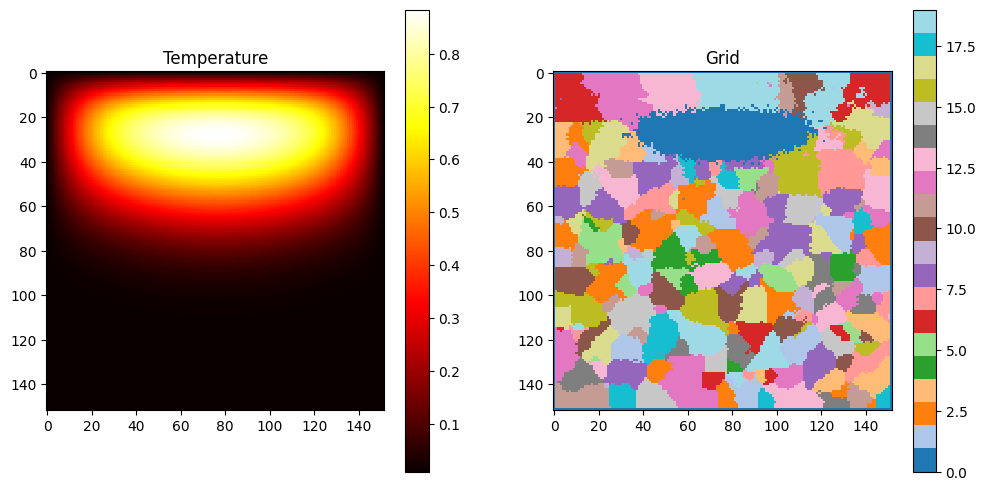

simulated for time 1.5374999999999783


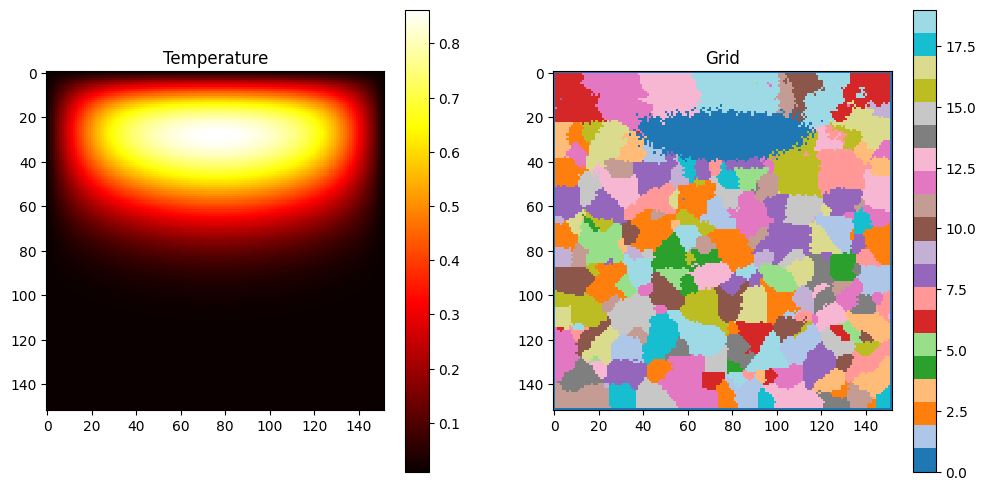

simulated for time 1.6399999999999761


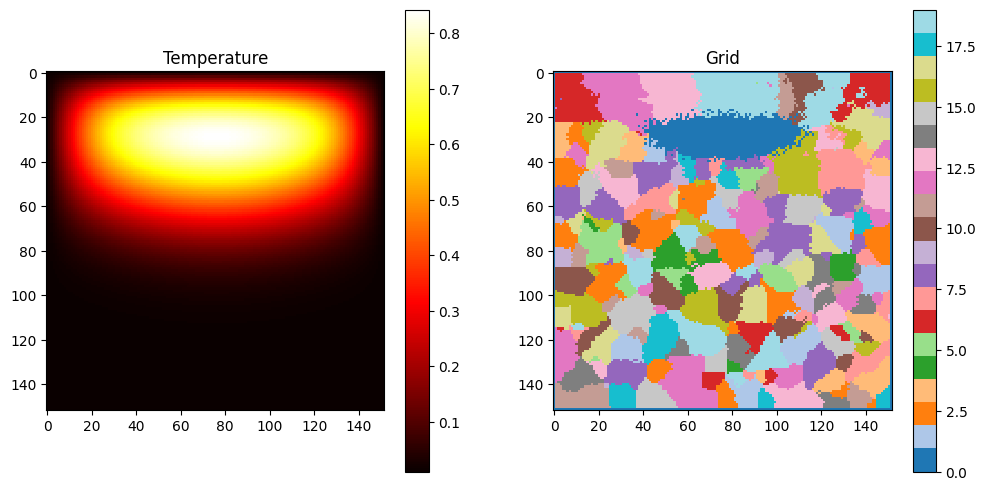

simulated for time 1.742499999999974


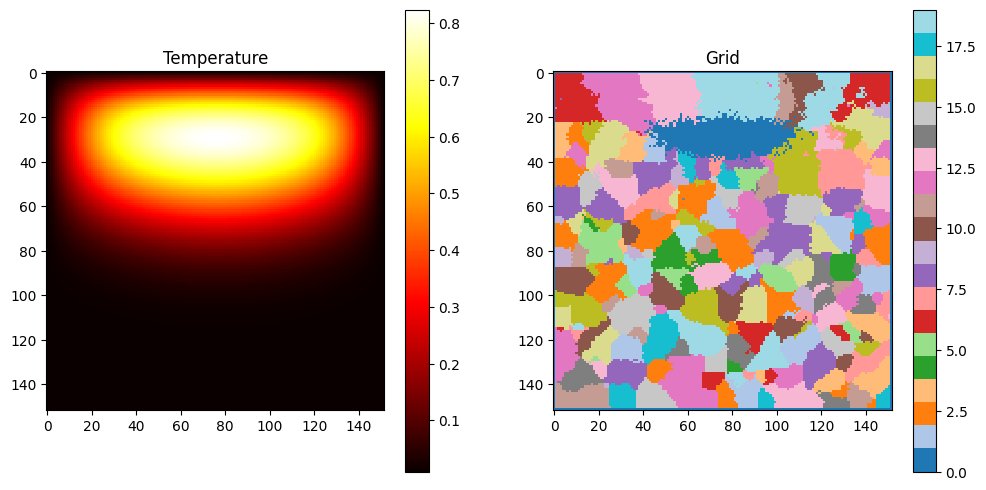

simulated for time 1.8449999999999718


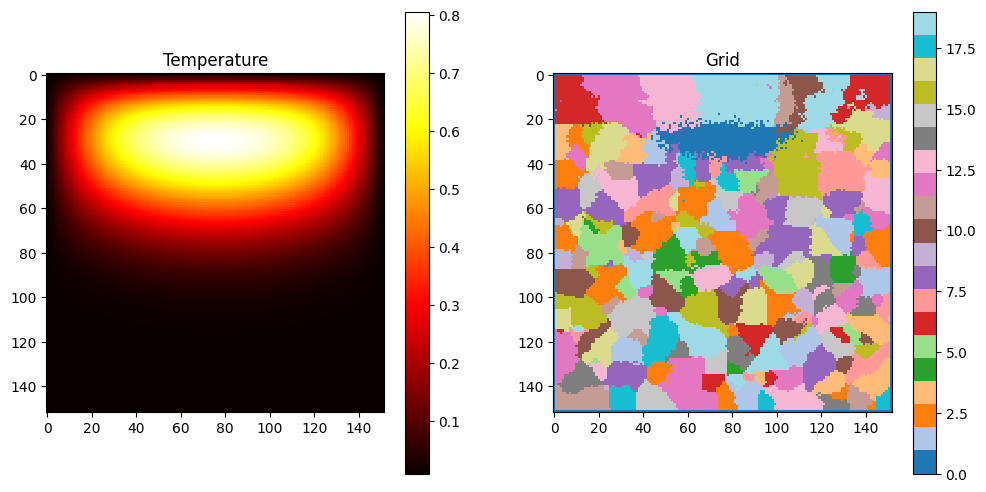

simulated for time 1.9474999999999696


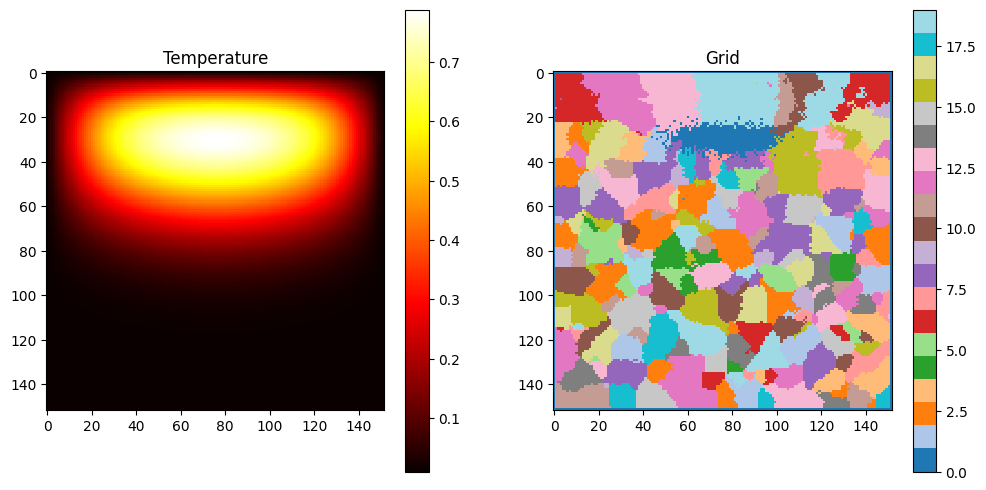

simulated for time 2.0499999999999674


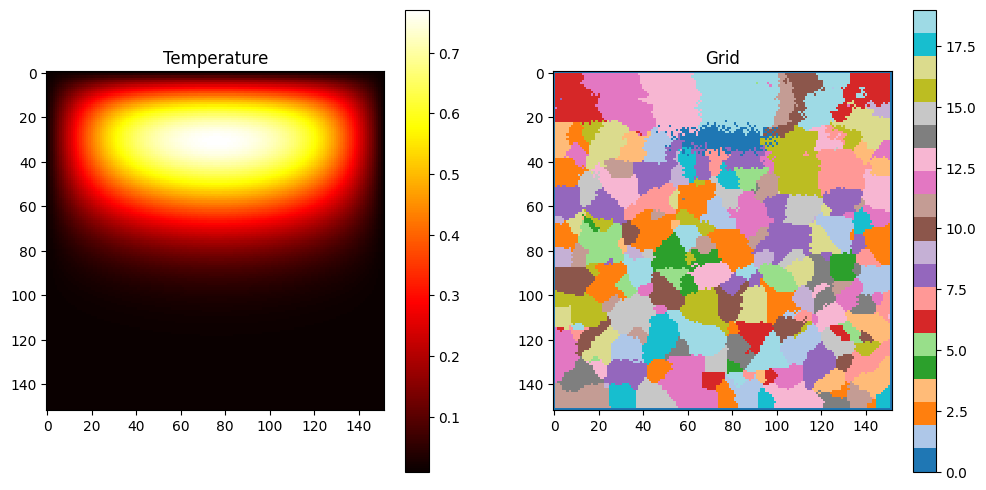

simulated for time 2.152499999999965


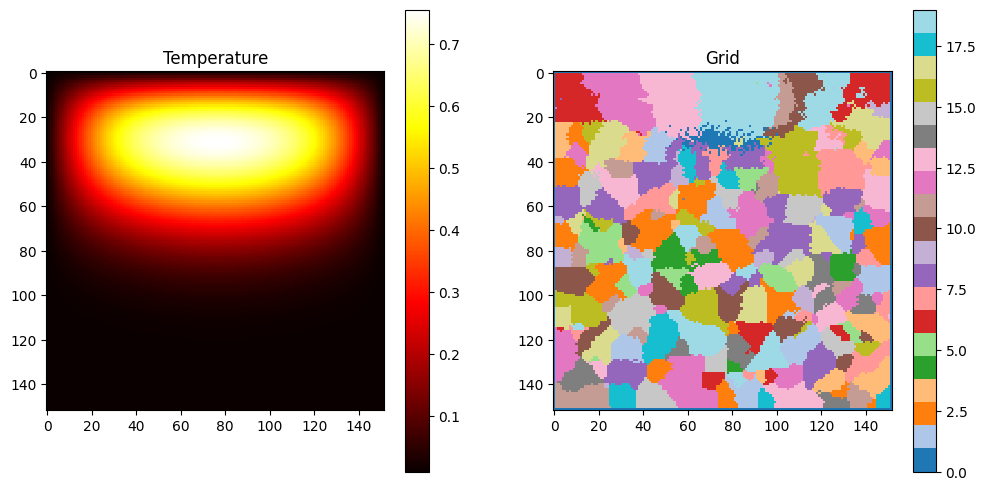

simulated for time 2.254999999999963


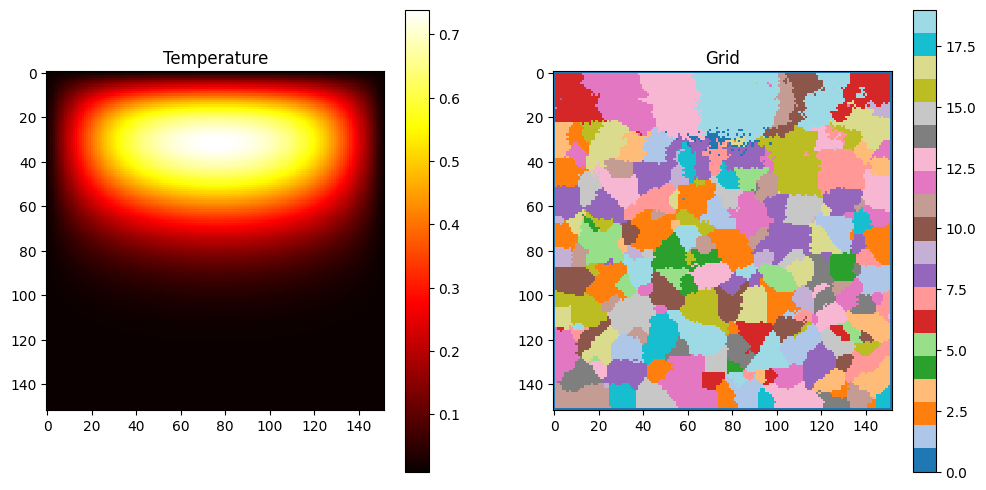

simulated for time 2.357499999999961


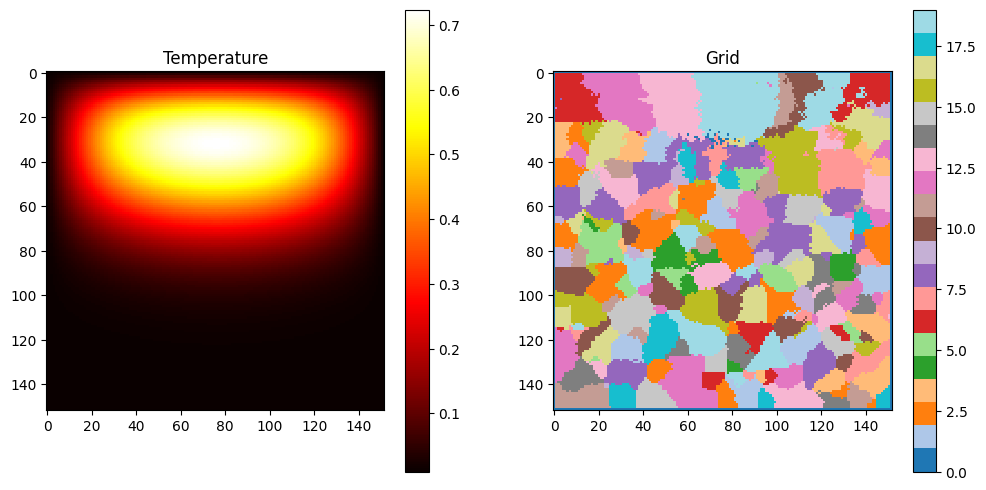

simulated for time 2.4599999999999587


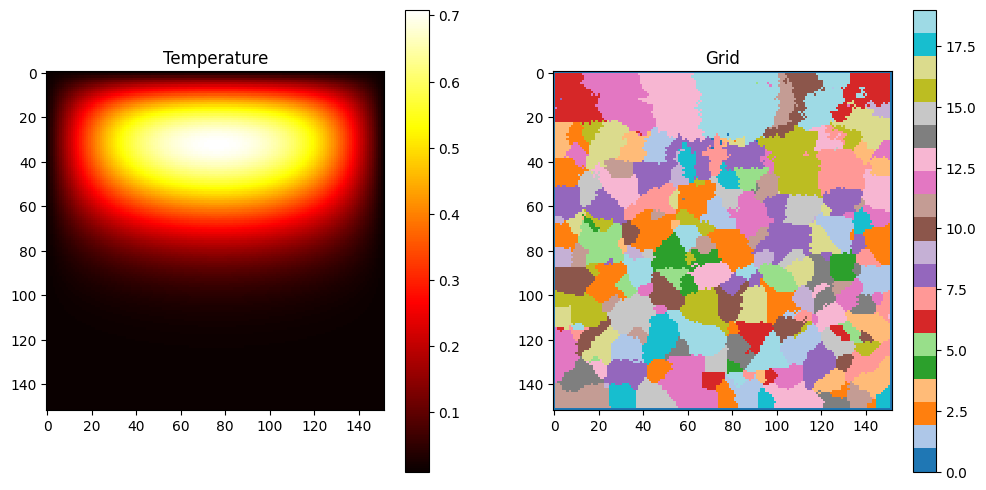

simulated for time 2.5624999999999565


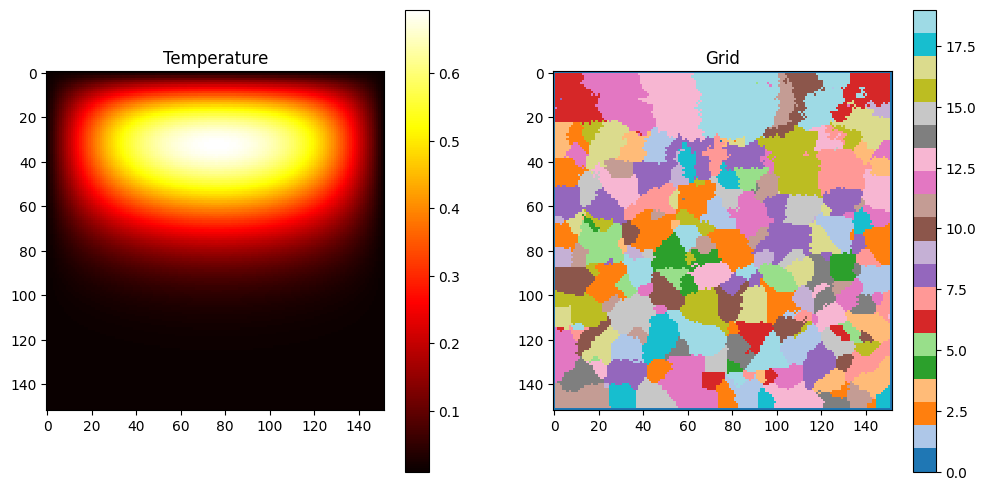

simulated for time 2.6649999999999543


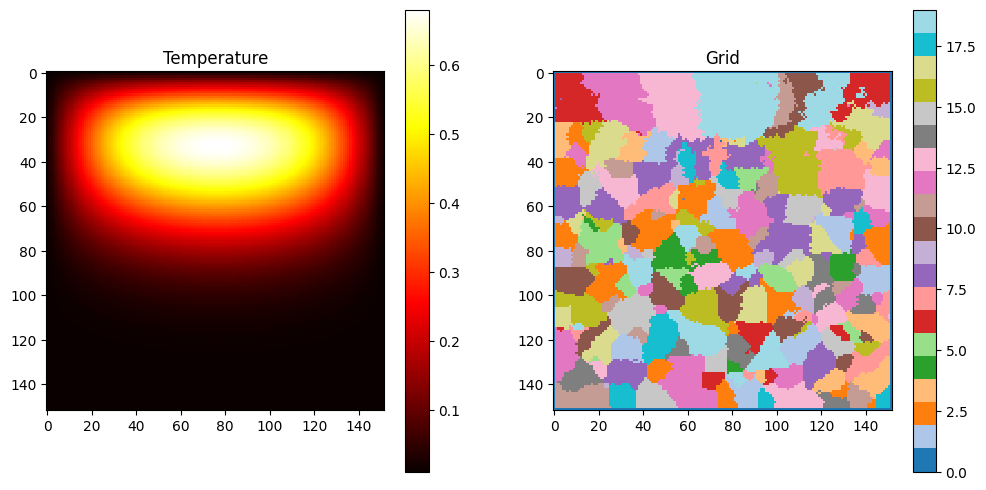

simulated for time 2.767499999999952


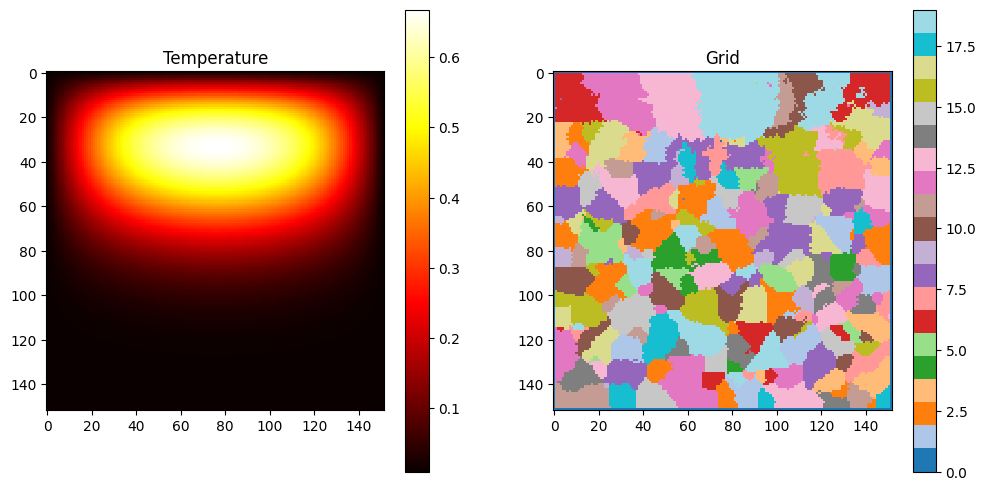

simulated for time 2.86999999999995


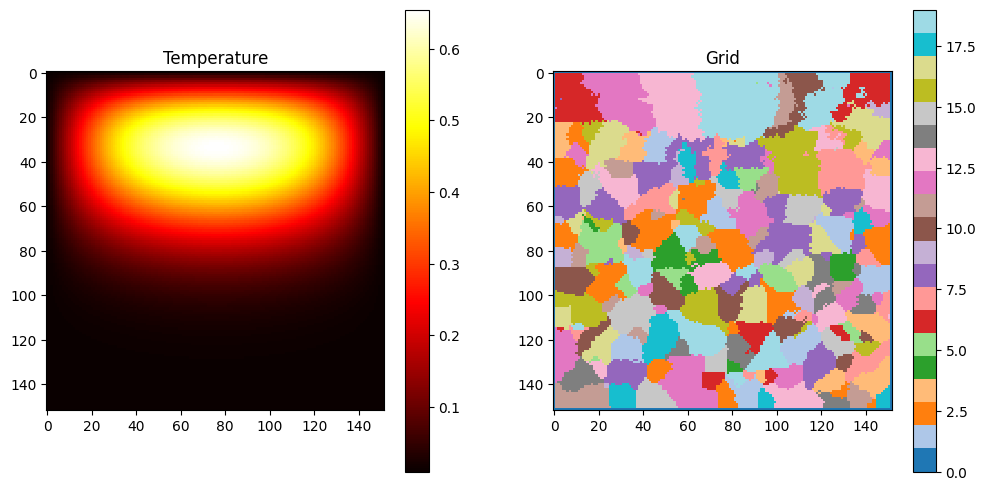

simulated for time 2.9724999999999477


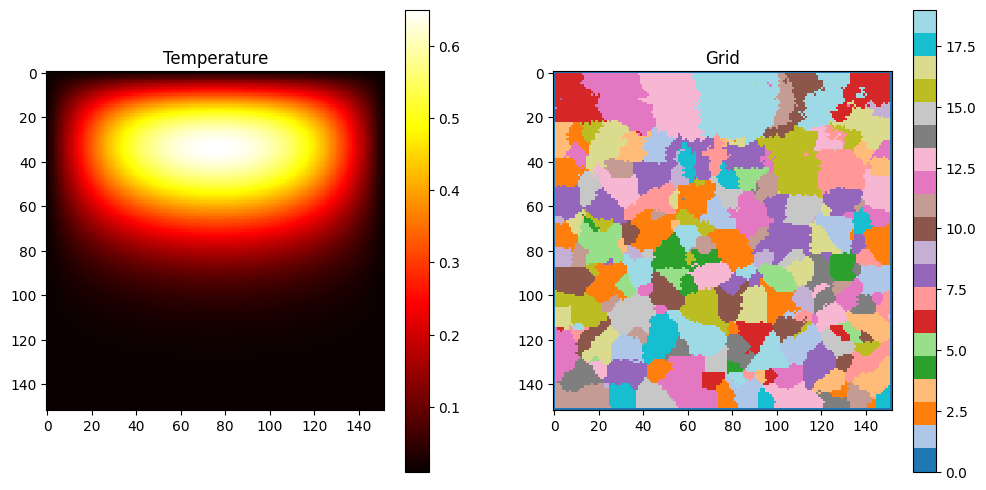

simulated for time 3.002499999999947


D:\Temp\ipykernel_4656\2418245141.py:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(path))


In [34]:
import numpy as np
import matplotlib.pyplot as plt

size = 150

points = [
    (-size / 2, size / 2, 0.1),
]

# Grid parameters
# length, width, height = 0.21, 0.31, 0.41  # dimensions of the rod. add 0.01 for di
dx, dy = 0.1, 0.1  # grid spacing in x, y, z
dt = 0.01  # time step

time = 0
end_time = 3

# Initial conditions
initial_temp = 2
air_temp = 0.01

# Material properties
k = 1  # thermal conductivity

if dt > 1 / (2 * k * (1 / dx / dx + 1 / dy / dy)):
    dt = 1 / (2 * k * (1 / dx / dx + 1 / dy / dy))
    print(f"Adjusted dt for stability. New value dt={dt}")


nx = ny = size


u = air_temp * np.ones((nx + 2, ny + 2))

print(u.shape)


# Apply boundary conditions
# Cold end boundary condition (example: all faces at one end)
# Air temperature boundary condition (example: all faces at the opposite end)
u[0, :] = air_temp  # 1100
u[:, 0] = air_temp
u[-1, :] = air_temp
u[:, -1] = air_temp


# Update temperature function for 2D
def update_temp_2d(u, dt, dx, dy, k):
    u_new = u.copy()
    for i in range(1, u.shape[0] - 1):
        for j in range(1, u.shape[1] - 1):
            u_new[i, j] = u[i, j] + k * dt * (
                (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) / dx**2
                + (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]) / dy**2
            )

    return u_new


def apply_heat(u, x, y, r):
    u_new = u.copy()
    for i in range(1, u.shape[0] - 1):
        for j in range(1, u.shape[1] - 1):
            if ((i - x) * (i - x) + (j - y) * (j - y)) <= r * r:
                u_new[i, j] = initial_temp - (initial_temp - air_temp) * (
                    ((i - x) * (i - x) + (j - y) * (j - y)) / (r * r)
                )

    return u_new


n = 0

lastDrawN = 0
# lastCAN = 0
dtCA = 0.01
timeCA = 0

grid = initialize_grid(size + 2, (size * size // 500))

img_paths = []

cur_path = f"{n}.png"
img_paths.append(cur_path)
plot_combined(u, grid, f"{n}.png")
print(f"simulated for time {time}")


# Simulation loop
while time < end_time:
    time += dt
    n += 1
    while points and (points[0][2] < time):
        x, y, t = points.pop(0)
        u = apply_heat(u, x + 1, y + 1, size)
        grid = update_grid(grid, u, dt)
    u = update_temp_2d(u, dt, dx, dy, k)
    if time - timeCA > dtCA:
        timeCA += dtCA
        grid = update_grid(grid, u, dt)
    if (n - lastDrawN) * dt > 0.1:
        lastDrawN = n
        cur_path = f"{n}.png"
        img_paths.append(cur_path)
        plot_combined(u, grid, f"{n}.png")
        print(f"simulated for time {time}")

cur_path = f"{n}.png"
img_paths.append(cur_path)
plot_combined(u, grid, f"{n}.png")
print(f"simulated for time {time}")

gen_gif(img_paths)